In [1]:
# Import necessary libraries
import os
import zipfile
import shutil
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Preparing the data
def prepare_netflix_data(input_path):
    """
    Prepares the Netflix dataset.
    - If ZIP, it extracts the file.
    - Renames the CSV to 'Netflix_shows_movies.csv' only if needed.
    """
    target_name = "Netflix_shows_movies.csv"

    if os.path.exists(target_name):
        print(f"File already prepared: {target_name}")
        return target_name

    if input_path.endswith(".zip"):
        with zipfile.ZipFile(input_path, 'r') as zip_ref:
            zip_ref.extractall()
            for name in zip_ref.namelist():
                if name.endswith(".csv"):
                    os.rename(name, target_name)
                    print(f"Extracted and renamed: {name} -> {target_name}")
                    return target_name
    elif input_path.endswith(".csv"):
        os.rename(input_path, target_name)
        print(f"Renamed file to: {target_name}")
        return target_name
    else:
        raise ValueError("Error: Unsupported file type. Please provide a .zip or .csv file.")

csv_file = prepare_netflix_data("netflix_data.csv")  # Or your full path if needed

df = pd.read_csv(csv_file)


        

Renamed file to: Netflix_shows_movies.csv


In [3]:
# Preview basic information
print("Dataset shape: ", df.shape)
print("\nColumn info: ")
print(df.info())
print("\nFirst few rows: ")
print(df.head())

Dataset shape:  (6234, 12)

Column info: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6234 entries, 0 to 6233
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       6234 non-null   int64 
 1   type          6234 non-null   object
 2   title         6234 non-null   object
 3   director      4265 non-null   object
 4   cast          5664 non-null   object
 5   country       5758 non-null   object
 6   date_added    6223 non-null   object
 7   release_year  6234 non-null   int64 
 8   rating        6224 non-null   object
 9   duration      6234 non-null   object
 10  listed_in     6234 non-null   object
 11  description   6234 non-null   object
dtypes: int64(2), object(10)
memory usage: 584.6+ KB
None

First few rows: 
    show_id     type                                    title  \
0  81145628    Movie  Norm of the North: King Sized Adventure   
1  80117401    Movie               Jandino: Whatever it T

In [4]:
# Handle missing values
df.fillna("Unknown", inplace=True)

In [5]:
# Statistical summary
print("\nNumeric summary (release_year): ")
print(df['release_year'].describe())

df['duration_minutes'] = df['duration'].str.extract('(\d+)').astype(float)
print("\nDuration (minutes) summary: ")
print(df['duration_minutes'].describe())


Numeric summary (release_year): 
count    6234.00000
mean     2013.35932
std         8.81162
min      1925.00000
25%      2013.00000
50%      2016.00000
75%      2018.00000
max      2020.00000
Name: release_year, dtype: float64

Duration (minutes) summary: 
count    6234.000000
mean       68.362047
std        50.862874
min         1.000000
25%         2.000000
50%        87.000000
75%       105.000000
max       312.000000
Name: duration_minutes, dtype: float64


In [6]:
# Extract generes and count frequency
genre_series = df['listed_in'].str.split(', ').explode()
top_genres = genre_series.value_counts().head(10)

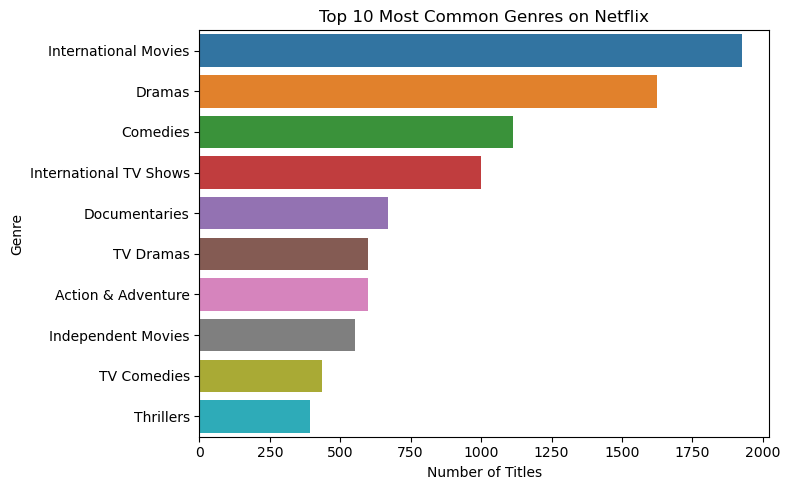

In [7]:
# Plot most watched genres
plt.figure(figsize=(8, 5))
sns.barplot(x=top_genres.values, y=top_genres.index)
plt.title("Top 10 Most Common Genres on Netflix")
plt.xlabel("Number of Titles")
plt.ylabel("Genre")
plt.tight_layout()
plt.show()

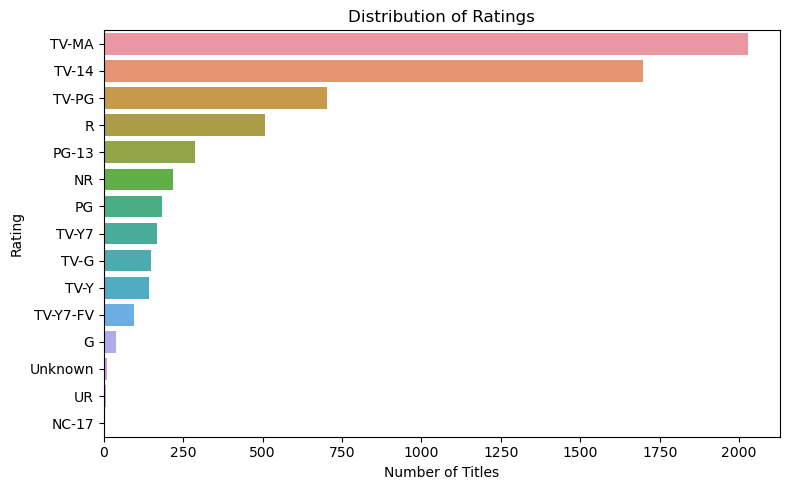

In [8]:
# Plot rating distribution
plt.figure(figsize=(8, 5))
sns.countplot(y='rating', data=df, order=df['rating'].value_counts().index)
plt.title("Distribution of Ratings")
plt.xlabel("Number of Titles")
plt.ylabel("Rating")
plt.tight_layout()
plt.show()